In [3]:
# First we import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [129]:
# Load the dataset:
df = pd.read_csv('worldbank_sample.csv')

In [130]:
# Display the first few rows of the dataset:
df.head()

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,China,CHN,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,769.601524864209,736.887203366372,752.66364174266,788.163387728662,816.196770764534,866.866179762295,...,2134.95604987416,2175.39434497632,2172.63043957296,2147.5478242754,2214.86726749259,2310.14470066159,2403.41507353211,2472.54314843967,2634.35668162948,2690.56034893867
1,China,CHN,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,510.619854913516,548.953753106589,604.694541490339,662.63704558569,727.107359659684,770.280241190849,...,3757.18508846571,4006.16826789906,4017.07781948893,4237.54530584599,4571.04242541442,4842.2067923237,5082.38779040238,5261.94103890582,5847.80226004701,6112.13553560996
2,China,CHN,"Energy imports, net (% of energy use)",EG.IMP.CONS.ZS,-4.01026432487411,-3.60248747058664,-2.64771932183423,-0.370860440091572,-1.47987332453464,-1.25424458501189,...,17.3453515264704,17.55738458017,16.7214014141286,19.2059244612692,20.4282280929568,21.6696505771845,22.2772652666578,23.025317870584,21.7428127985827,20.7454987193268
3,China,CHN,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,100,100,100,100,100,100,100,100,100,100
4,China,CHN,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,65.8,68.8,71.5,74.4,77.1,79.5,82,83.8,85.9,87.8


In [131]:
# Check the shape of the dataset:
df.shape

(1293, 37)

In [132]:
# Check the attribute names:
df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]',
       '2022 [YR2022]'],
      dtype='object')

In [133]:
# Change data types of numerical columns:
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [134]:
# Transform al '..' to NaN:
df = df.replace("..", np.nan)

In [135]:
# Get a summary of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   1290 non-null   object 
 1   Country Code   1288 non-null   object 
 2   Series Name    1288 non-null   object 
 3   Series Code    1288 non-null   object 
 4   1990 [YR1990]  1003 non-null   object 
 5   1991 [YR1991]  923 non-null    float64
 6   1992 [YR1992]  937 non-null    float64
 7   1993 [YR1993]  947 non-null    float64
 8   1994 [YR1994]  952 non-null    float64
 9   1995 [YR1995]  1054 non-null   float64
 10  1996 [YR1996]  973 non-null    float64
 11  1997 [YR1997]  981 non-null    float64
 12  1998 [YR1998]  977 non-null    float64
 13  1999 [YR1999]  983 non-null    float64
 14  2000 [YR2000]  1272 non-null   float64
 15  2001 [YR2001]  1183 non-null   float64
 16  2002 [YR2002]  1182 non-null   float64
 17  2003 [YR2003]  1184 non-null   float64
 18  2004 [YR

In [136]:
# Identify data types of each attribute:
df.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
1990 [YR1990]     object
1991 [YR1991]    float64
1992 [YR1992]    float64
1993 [YR1993]    float64
1994 [YR1994]    float64
1995 [YR1995]    float64
1996 [YR1996]    float64
1997 [YR1997]    float64
1998 [YR1998]    float64
1999 [YR1999]    float64
2000 [YR2000]    float64
2001 [YR2001]    float64
2002 [YR2002]    float64
2003 [YR2003]    float64
2004 [YR2004]    float64
2005 [YR2005]    float64
2006 [YR2006]    float64
2007 [YR2007]    float64
2008 [YR2008]    float64
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
dtype: object

In [137]:
# Now we found null and missing values in the dataset:
missing_percent = df.iloc[:, 5:].isnull().mean() * 100
print(missing_percent.round(2))

1991 [YR1991]    28.62
1992 [YR1992]    27.53
1993 [YR1993]    26.76
1994 [YR1994]    26.37
1995 [YR1995]    18.48
1996 [YR1996]    24.75
1997 [YR1997]    24.13
1998 [YR1998]    24.44
1999 [YR1999]    23.98
2000 [YR2000]     1.62
2001 [YR2001]     8.51
2002 [YR2002]     8.58
2003 [YR2003]     8.43
2004 [YR2004]     8.58
2005 [YR2005]     1.47
2006 [YR2006]     8.66
2007 [YR2007]     8.51
2008 [YR2008]     8.51
2009 [YR2009]     8.35
2010 [YR2010]     1.08
2011 [YR2011]     1.16
2012 [YR2012]     1.16
2013 [YR2013]     1.01
2014 [YR2014]     1.08
2015 [YR2015]     0.93
2016 [YR2016]     1.08
2017 [YR2017]     0.93
2018 [YR2018]     8.04
2019 [YR2019]     8.12
2020 [YR2020]     8.12
2021 [YR2021]     8.04
2022 [YR2022]    31.25
dtype: float64


In [138]:
# Now we process the missing values:
df.columns = df.columns.str.strip()
numeric_cols = df.columns[5:]
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', axis=1, limit_direction='both')
df[numeric_cols] = df[numeric_cols].bfill(axis=1).ffill(axis=1)
df[numeric_cols] = df.groupby("Series Code")[numeric_cols].transform(lambda g: g.fillna(g.median()))
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df = df.dropna(subset=numeric_cols, how='all').reset_index(drop=True)

In [139]:
# Verify that there are no more missing values:
total_missing_after = df[numeric_cols].isna().sum().sum()
print(total_missing_after)

0


array([[<Axes: title={'center': '1991 [YR1991]'}>,
        <Axes: title={'center': '1992 [YR1992]'}>,
        <Axes: title={'center': '1993 [YR1993]'}>,
        <Axes: title={'center': '1994 [YR1994]'}>,
        <Axes: title={'center': '1995 [YR1995]'}>,
        <Axes: title={'center': '1996 [YR1996]'}>],
       [<Axes: title={'center': '1997 [YR1997]'}>,
        <Axes: title={'center': '1998 [YR1998]'}>,
        <Axes: title={'center': '1999 [YR1999]'}>,
        <Axes: title={'center': '2000 [YR2000]'}>,
        <Axes: title={'center': '2001 [YR2001]'}>,
        <Axes: title={'center': '2002 [YR2002]'}>],
       [<Axes: title={'center': '2003 [YR2003]'}>,
        <Axes: title={'center': '2004 [YR2004]'}>,
        <Axes: title={'center': '2005 [YR2005]'}>,
        <Axes: title={'center': '2006 [YR2006]'}>,
        <Axes: title={'center': '2007 [YR2007]'}>,
        <Axes: title={'center': '2008 [YR2008]'}>],
       [<Axes: title={'center': '2009 [YR2009]'}>,
        <Axes: title={'cente

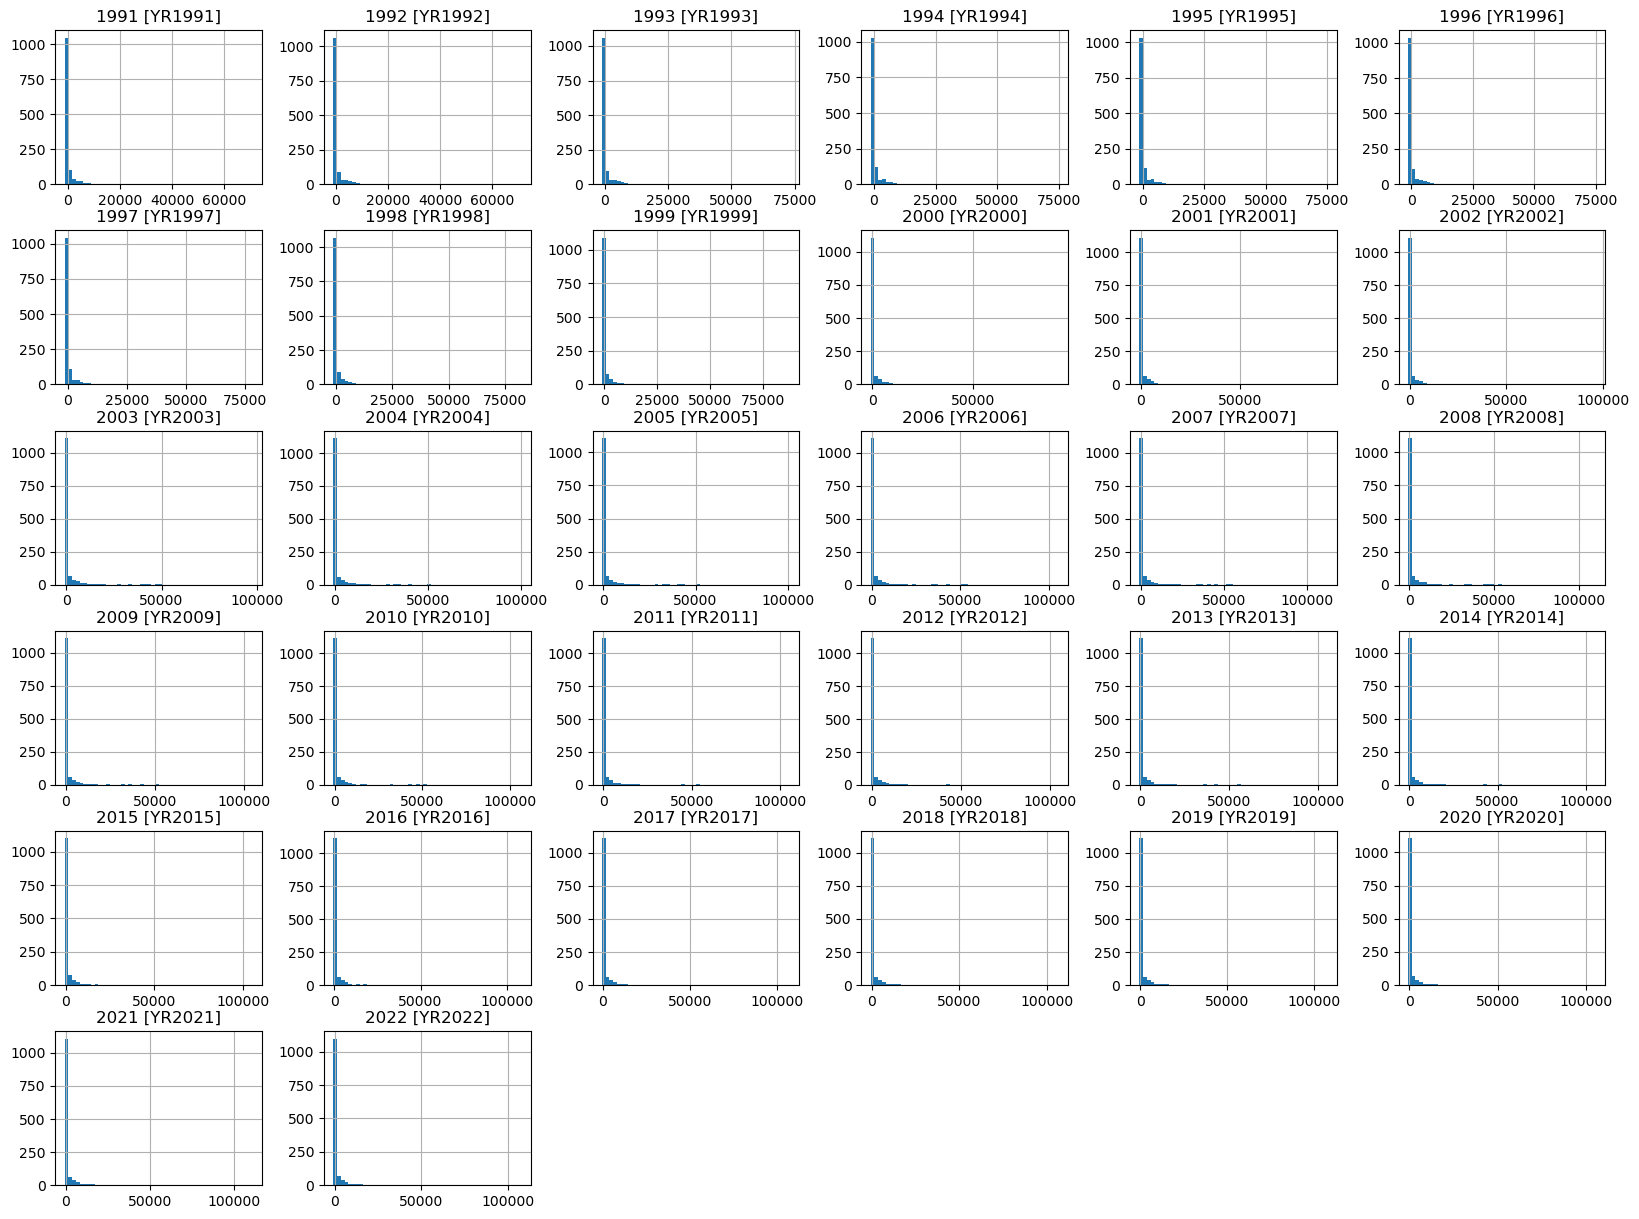

In [140]:
# Check the histograms of numerical attributes:
df.iloc[:, 5:].hist(bins=50, figsize=(20, 15))

In [141]:
# Verify duplicates in the dataset:
duplicates = df.duplicated().sum()
print(duplicates)

2


In [142]:
if duplicates > 0:
    df.drop_duplicates(inplace=True)

In [143]:
# Now we check the variance of numerical attributes (excluding identifiers):
variances = df.iloc[:, 5:].var()
print(variances)

1991 [YR1991]    2.626482e+07
1992 [YR1992]    2.630518e+07
1993 [YR1993]    2.667172e+07
1994 [YR1994]    2.807325e+07
1995 [YR1995]    2.911679e+07
1996 [YR1996]    3.021266e+07
1997 [YR1997]    3.225449e+07
1998 [YR1998]    3.439721e+07
1999 [YR1999]    3.677935e+07
2000 [YR2000]    3.968078e+07
2001 [YR2001]    4.083233e+07
2002 [YR2002]    4.173782e+07
2003 [YR2003]    4.251815e+07
2004 [YR2004]    4.499743e+07
2005 [YR2005]    4.681770e+07
2006 [YR2006]    4.979000e+07
2007 [YR2007]    5.336271e+07
2008 [YR2008]    5.371396e+07
2009 [YR2009]    4.938831e+07
2010 [YR2010]    5.105145e+07
2011 [YR2011]    5.176381e+07
2012 [YR2012]    5.185159e+07
2013 [YR2013]    5.266586e+07
2014 [YR2014]    5.375111e+07
2015 [YR2015]    5.587469e+07
2016 [YR2016]    5.731056e+07
2017 [YR2017]    5.909642e+07
2018 [YR2018]    6.086010e+07
2019 [YR2019]    6.192869e+07
2020 [YR2020]    5.815356e+07
2021 [YR2021]    6.499564e+07
2022 [YR2022]    6.767776e+07
dtype: float64


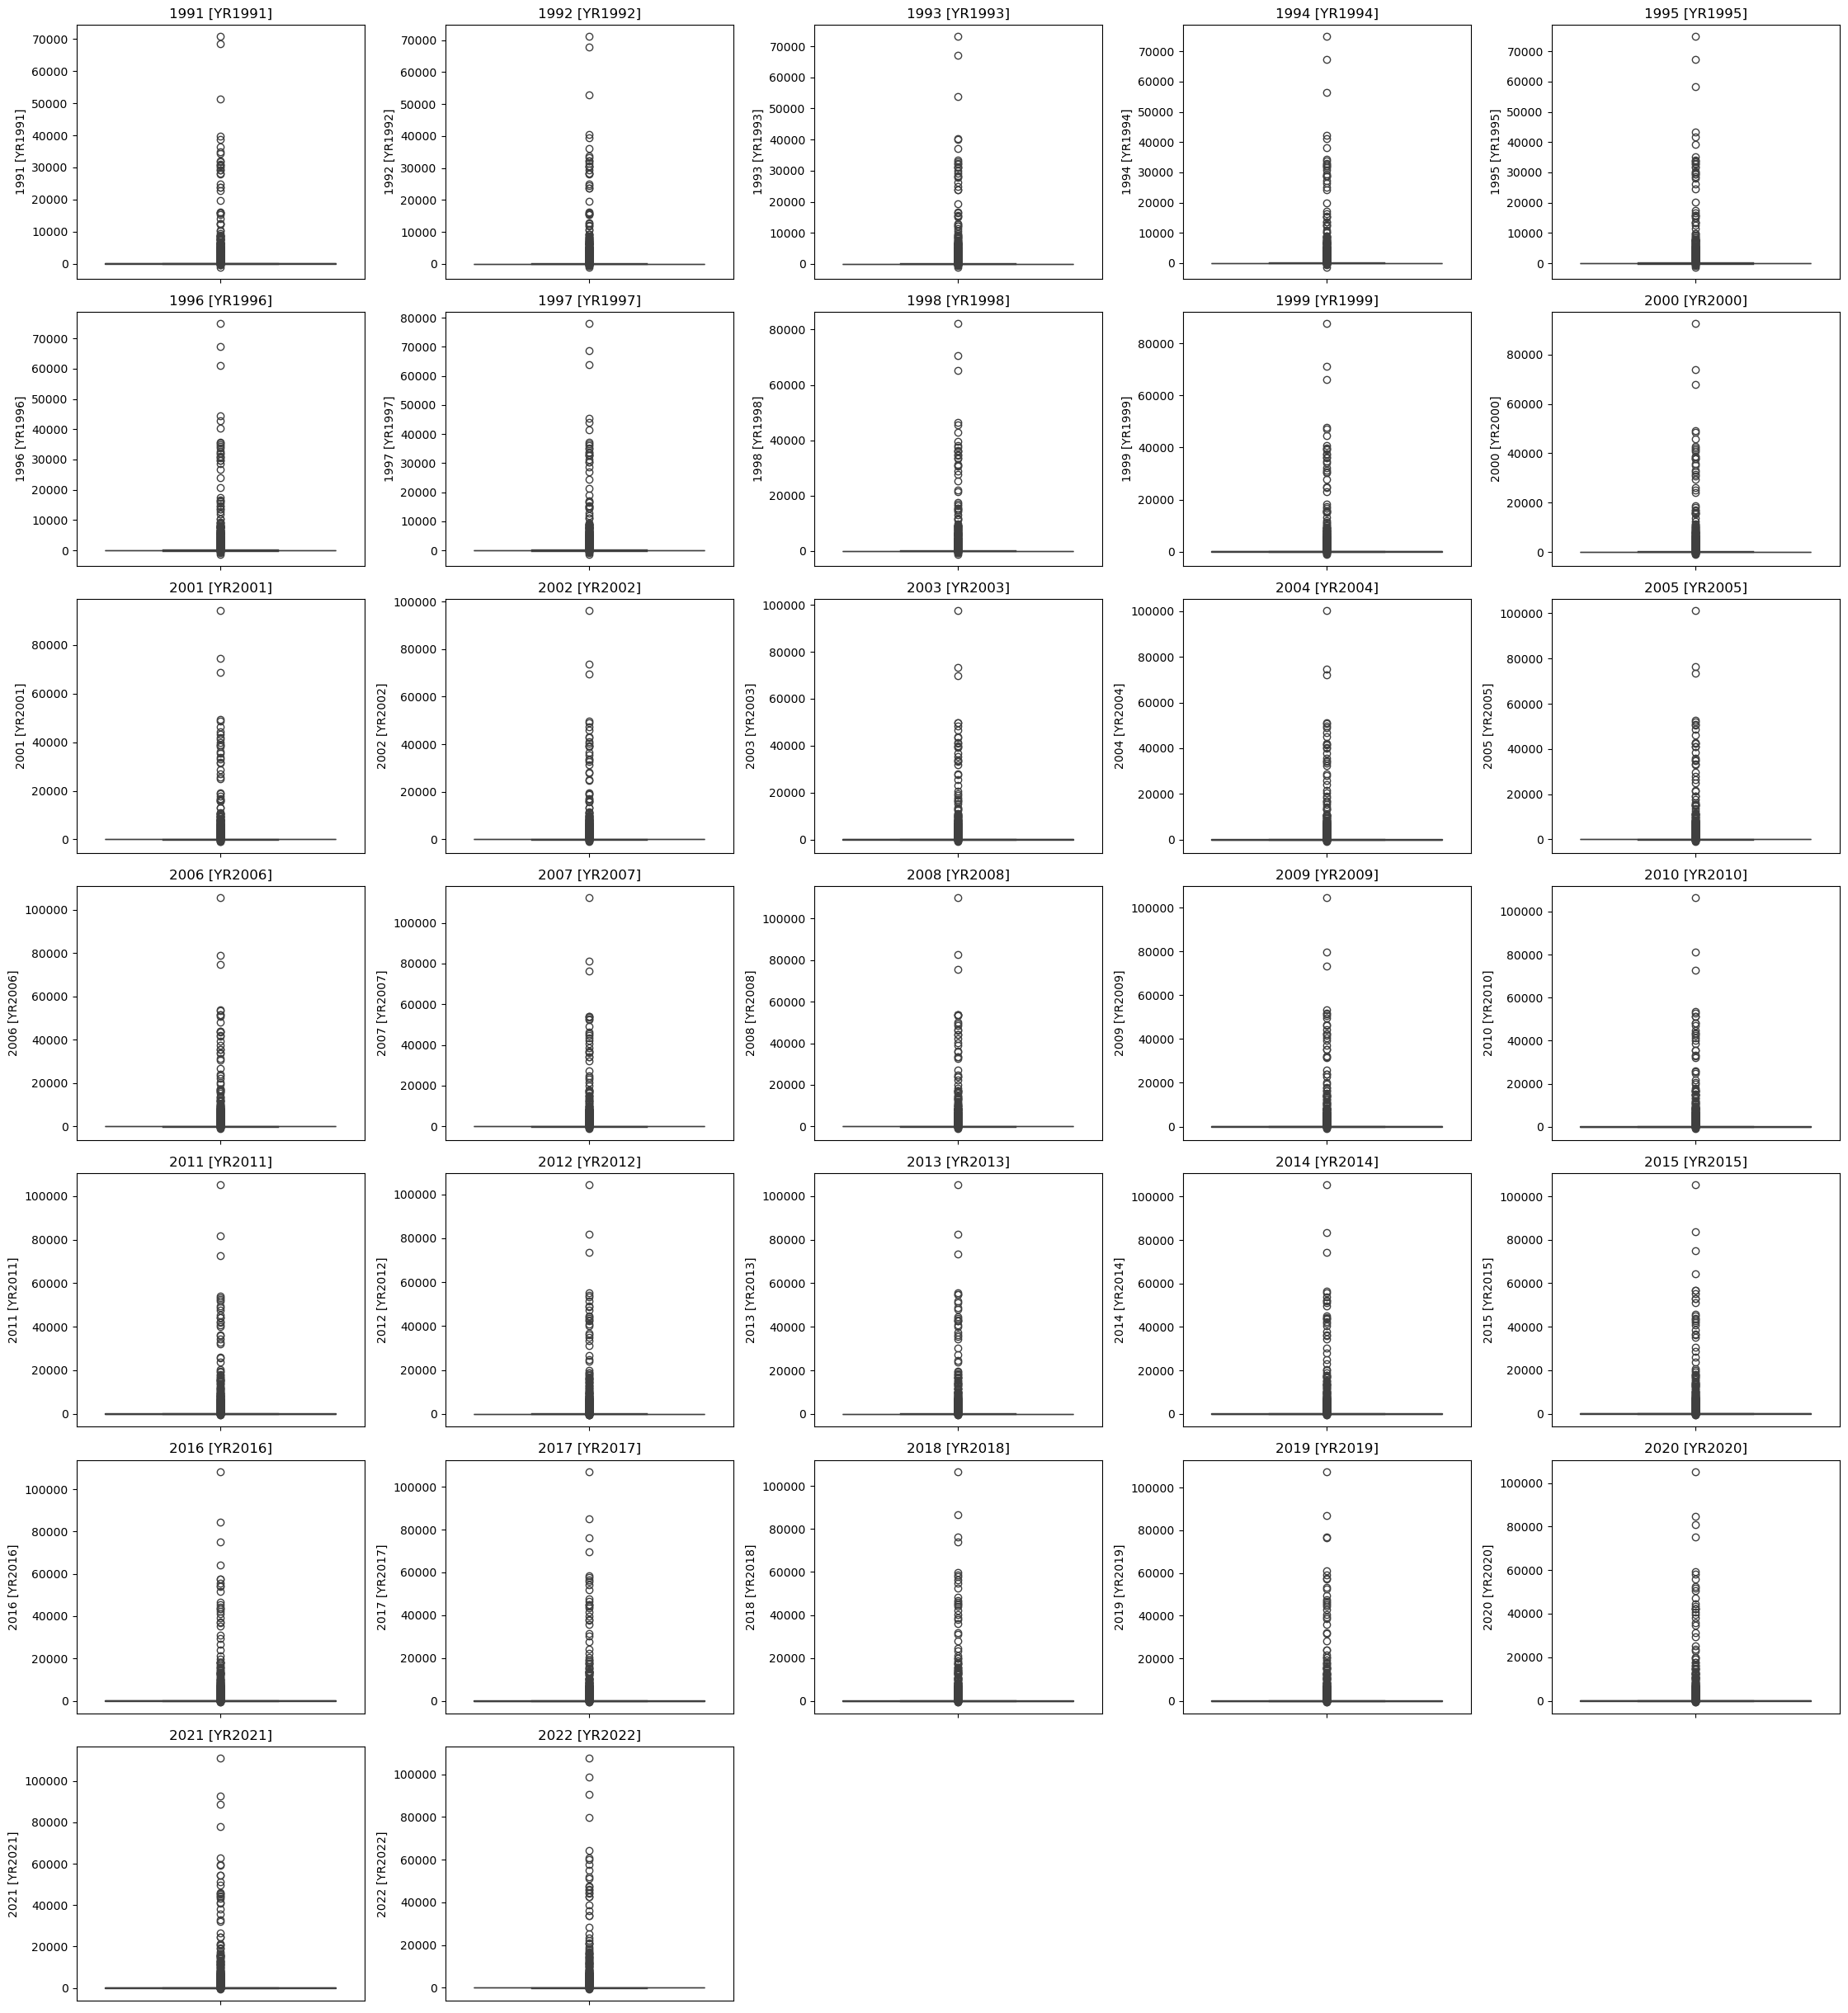

In [144]:
# Now we check for outliers using box plots:
numeric_cols = df.columns[5:]
n = len(numeric_cols)
cols = 5
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4.5*cols, 3.5*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(n, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

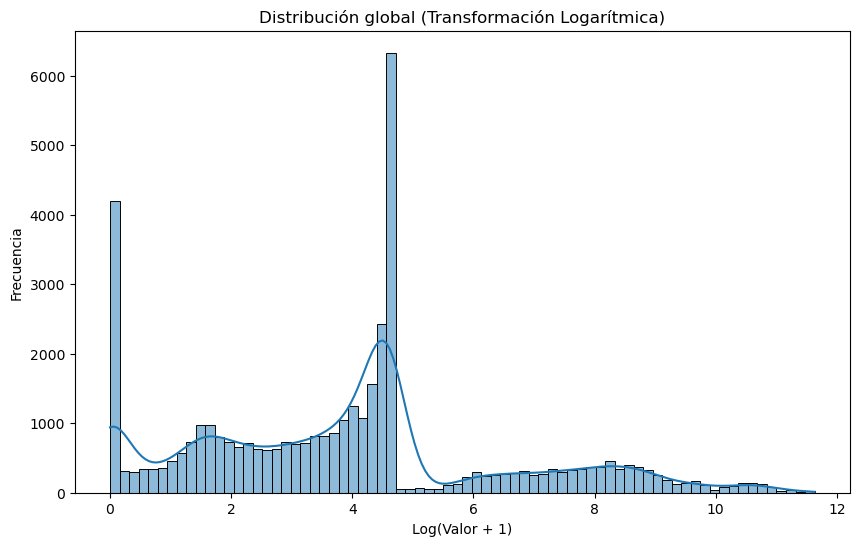

In [145]:
# Logarithmic transformation to reduce skewness:
df_log = df.copy()
df_log[numeric_cols] = np.log1p(df[numeric_cols].clip(lower=0))

plt.figure(figsize=(10,6))
sns.histplot(df_log[numeric_cols].stack(), kde=True)
plt.title('Distribución global (Transformación Logarítmica)')
plt.xlabel('Log(Valor + 1)')
plt.ylabel('Frecuencia')
plt.show()

In [146]:
# Winsorization to limit extreme values:
for col in numeric_cols:
    q_high = df_log[col].quantile(0.99)
    df_log[col] = np.where(df_log[col] > q_high, q_high, df_log[col])

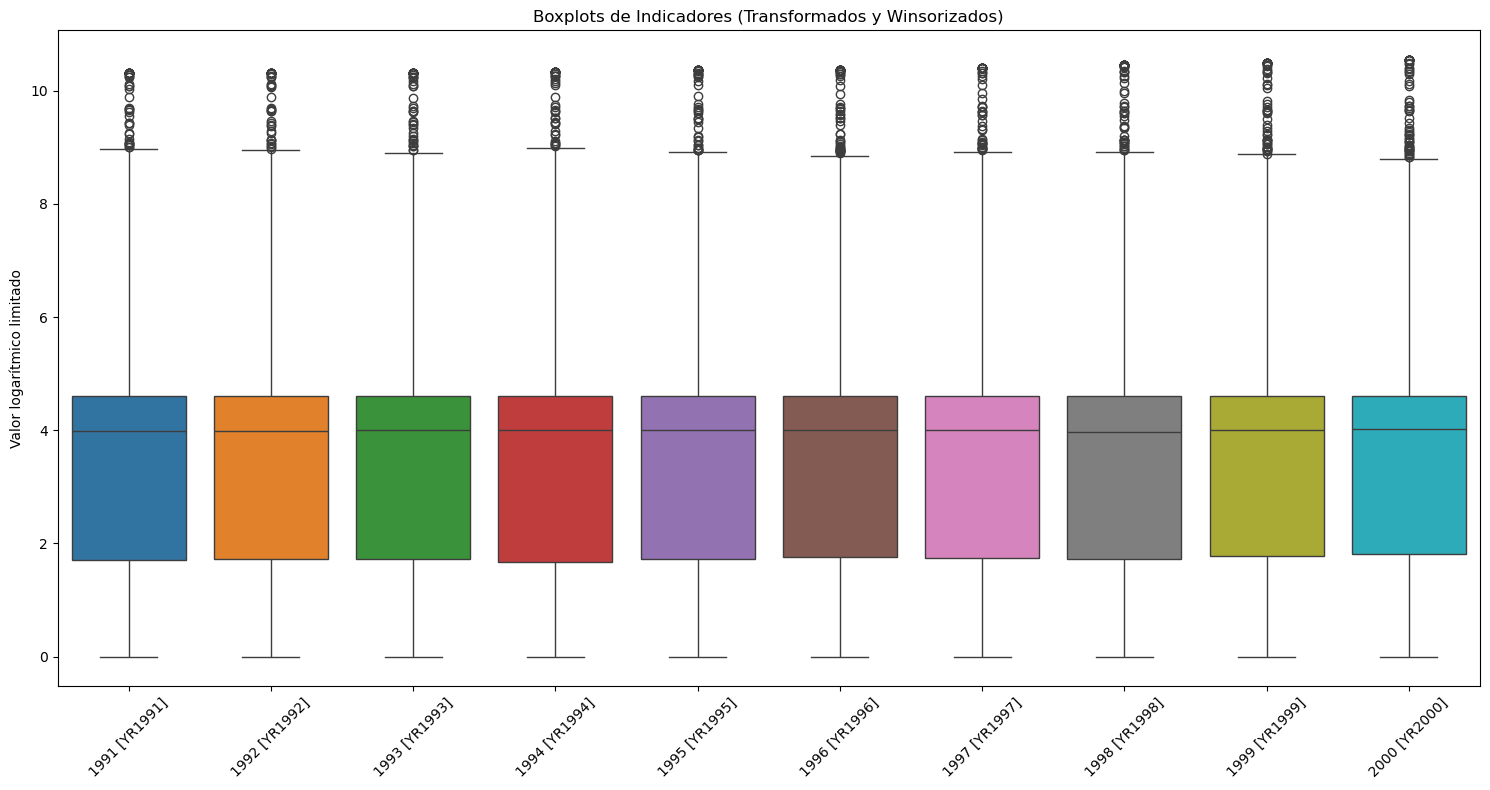

In [147]:
# Result visualization:
cols_to_plot = numeric_cols[:10] if len(numeric_cols) > 10 else numeric_cols

plt.figure(figsize=(15,8))
sns.boxplot(data=df_log[cols_to_plot])
plt.title('Boxplots de Indicadores (Transformados y Winsorizados)')
plt.ylabel('Valor logarítmico limitado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
# We change the head years to more descriptive names:
df.columns = df.columns.str.strip()
df.rename(columns=lambda x: int(x.split()[0]) if '[YR' in x else x, inplace=True)

In [149]:
# Resume categorial attributes:
df['Series Name'] = df['Series Code'].map({
    'EG.USE.PCAP.KG.OE': 'Energy use per capita',
    'EG.USE.ELEC.KH.PC': 'Electric power consumption',
    'EG.IMP.CONS.ZS': 'Energy imports',
    'EG.ELC.ACCS.ZS': 'Access to electricity',
    'EG.CFT.ACCS.ZS': 'Clean fuels access',
    'NY.GDP.PCAP.KD': 'GDP per capita',
    'EN.ATM.PM25.MC.ZS': 'PM2.5 pollution exposure',
    'EG.USE.COMM.FO.ZS': 'Fossil fuel consumption',
    'EG.FEC.RNEW.ZS': 'Renewable energy consumption',
    'EG.ELC.RNWX.ZS': 'Renewable electricity (non-hydro)',
    'EG.ELC.HYRO.ZS': 'Hydroelectric electricity',
    'EG.ELC.NUCL.ZS': 'Nuclear electricity',
    'TX.VAL.FUEL.ZS.UN': 'Fuel exports',
    'EG.EGY.PRIM.PP.KD': 'Energy intensity'
}).fillna(df['Series Name'])

In [150]:
# Now we save the cleaned dataset:
df.to_csv('worldbank_cleaned.csv', index=False)

In [6]:
df = pd.read_csv('worldbank_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  1290 non-null   object 
 1   Country Code  1288 non-null   object 
 2   Series Name   1288 non-null   object 
 3   Series Code   1288 non-null   object 
 4   1990          1003 non-null   float64
 5   1991          1291 non-null   float64
 6   1992          1291 non-null   float64
 7   1993          1291 non-null   float64
 8   1994          1291 non-null   float64
 9   1995          1291 non-null   float64
 10  1996          1291 non-null   float64
 11  1997          1291 non-null   float64
 12  1998          1291 non-null   float64
 13  1999          1291 non-null   float64
 14  2000          1291 non-null   float64
 15  2001          1291 non-null   float64
 16  2002          1291 non-null   float64
 17  2003          1291 non-null   float64
 18  2004          1291 non-null 

In [7]:
# Now we display what countries unique are in the dataset:
unique_countries = df['Country Name'].nunique()
print(f'Total unique countries: {unique_countries}')

Total unique countries: 94


In [8]:
# Now print the names of the unique countries:
country_names = df['Country Name'].unique()
print(country_names)

['China' 'Denmark' 'Ukraine' 'Uzbekistan' 'Uruguay' 'Armenia' 'Israel'
 'Iran, Islamic Rep.' 'Russian Federation' 'Bulgaria' 'Croatia' 'Iceland'
 'Canada' 'Gabon' 'Hungary' 'Luxembourg' 'India' 'Indonesia' 'Guatemala'
 'Ecuador' 'Kazakhstan' 'Colombia' 'Costa Rica' 'Cameroon' 'Turkiye'
 'Tanzania' 'Ethiopia' 'Senegal' 'Mexico' 'Togo' 'Dominican Republic'
 'Korea, Rep.' 'Austria' 'Bangladesh' 'Angola' 'Nicaragua' 'Nigeria'
 'Nepal' 'Pakistan' 'Paraguay' 'Panama' 'Brazil' 'Greece' 'Germany'
 'Italy' 'Norway' 'Czechia' 'Slovak Republic' 'Slovenia' 'Sri Lanka'
 'New Zealand' 'Japan' 'Chile' 'Georgia' 'Belgium' 'France' 'Poland'
 'Bosnia and Herzegovina' 'Thailand' 'Zimbabwe' 'Honduras' 'Haiti'
 'Australia' 'Ireland' 'Estonia' 'Jamaica' 'Trinidad and Tobago' 'Bolivia'
 'Sweden' 'Switzerland' "Cote d'Ivoire" 'Peru' 'Tunisia' 'Jordan'
 'Myanmar' 'Romania' 'United States' 'Kenya' 'Finland' 'United Kingdom'
 'Netherlands' 'Mozambique' 'Philippines' 'El Salvador' 'Portugal' 'Spain'
 'Benin' 'Zam